In [920]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Variable Notes
#### pclass: A proxy for socio-economic status (SES)
>1st = Upper

>2nd = Middle

>3rd = Lower

#### Survived:	
>if it's a "1", the passenger survived.

>if it's a "0", the passenger died.

#### age:   Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

#### sibsp:   The dataset defines family relations in this way...
#### Sibling = brother, sister, stepbrother, stepsister
#### Spouse = husband, wife (mistresses and fiancés were ignored)

#### parch:   The dataset defines family relations in this way...
#### Parent = mother, father
#### Child = daughter, son, stepdaughter, stepson
#### Some children travelled only with a nanny, therefore parch=0 for them.
#### Fare:   Cost of Tickets
#### embarked:	 Port of Embarkation( port Locations)	
>C = Cherbourg

>Q = Queenstown

>S = Southampton

## Reading Data

In [921]:
train_data = pd.read_csv(r'C:\Users\ccs\Documents\DataScience\ML\Projects\Project-3 (Titanic)\Titanic\train.csv')
test_data = pd.read_csv(r'C:\Users\ccs\Documents\DataScience\ML\Projects\Project-3 (Titanic)\Titanic\test.csv')
test_labels=pd.read_csv(r'C:\Users\ccs\Documents\DataScience\ML\Projects\Project-3 (Titanic)\Titanic\gender_submission.csv')
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [922]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [923]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


    ## Handling Missing Data

In [924]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

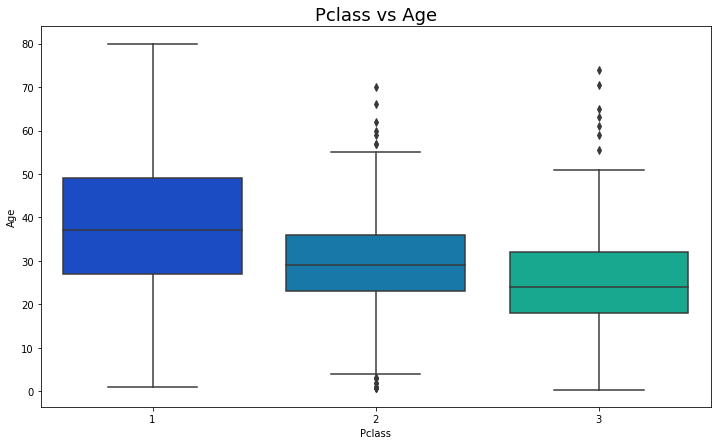

In [925]:
plt.figure(figsize=(12, 7))
plt.title('Pclass vs Age',fontsize=18)
sns.boxplot(x='Pclass',y='Age',data=train_data,palette='winter');

In [926]:
train_data.groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [927]:
def add_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [928]:
train_data['Age'] = train_data[['Age','Pclass']].apply(add_age,axis=1)
train_data['Age'].isna().sum()

0

In [929]:
test_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

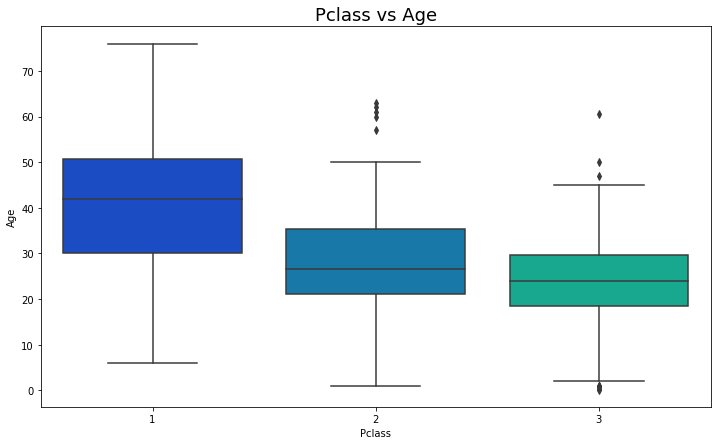

In [930]:
plt.figure(figsize=(12, 7))
plt.title('Pclass vs Age',fontsize=18)
sns.boxplot(x='Pclass',y='Age',data=test_data,palette='winter');

In [931]:
test_data.groupby('Pclass')['Age'].mean()

Pclass
1    40.918367
2    28.777500
3    24.027945
Name: Age, dtype: float64

In [932]:
def add_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 41

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [933]:
test_data['Age'] = test_data[['Age','Pclass']].apply(add_age,axis=1)
test_data['Age'].isna().sum()

0

In [934]:
train_data['Embarked'].isna().sum()

2

We had only 2 null values in Embarked variable we can either drop Embarked or fill it with most repeted values

In [935]:
train_data.Embarked.value_counts(normalize=True)

S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

In [936]:
train_data['Embarked'] = train_data['Embarked'].fillna('S')
train_data['Embarked'].isna().sum()

0

In [937]:
# Here Cabin had more number of null values so we drop it from out train data
train_data = train_data.drop('Cabin',axis=1)

In [938]:
test_data = test_data.drop('Cabin',axis=1)

In [939]:
test_data[test_data['Fare'].isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


In [940]:
x = test_data[test_data['Fare'].isna()].index
test_data.drop(labels=x, inplace=True)

In [941]:
test_labels

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [942]:
test_labels.drop([152], inplace = True)
test_labels = test_labels.drop('PassengerId',axis=1)

In [943]:
y_test = np.array(test_labels['Survived'])
y_test.shape

(417,)

In [944]:
test_data.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [945]:
# test_data=test_data.Fare.dropna()

In [946]:
test_data.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Duplicated Data

In [947]:
train_data[train_data.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


In [948]:
test_data[test_data.duplicated()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


We find no duplicated rows in our train & test dataset

In [949]:
# if there is any duplicated rows in our data here is a code given below

# x=train_data[train_data.duplicated()].index
# train_data.drop(labels=x,inplace=True)

In [950]:
# we can use train_data.duplicated().sum() code to find duplicated values

## Change of Data types

In [951]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [952]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Pclass       417 non-null    int64  
 2   Name         417 non-null    object 
 3   Sex          417 non-null    object 
 4   Age          417 non-null    float64
 5   SibSp        417 non-null    int64  
 6   Parch        417 non-null    int64  
 7   Ticket       417 non-null    object 
 8   Fare         417 non-null    float64
 9   Embarked     417 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 35.8+ KB


it seems like all Variables are perfectly fit to its data type, so we need not to change any Dtype

## Outlier Deduction

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

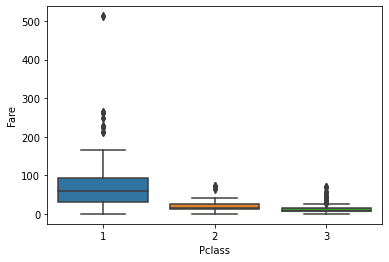

In [953]:
sns.boxplot(x='Pclass', y='Fare', data=train_data)

We found somthing Fishy in pclass 1  with Fare, so we gonna drop it

In [954]:
x=train_data[train_data.Fare>300].index
train_data.drop(labels=x, inplace=True)

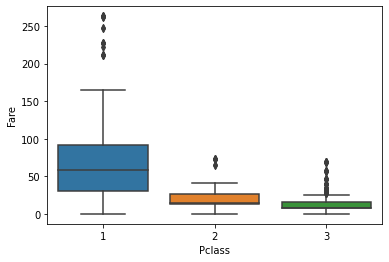

In [955]:
sns.boxplot(x='Pclass', y='Fare', data=train_data);

## EDA

In [956]:
train_data.Survived.value_counts(normalize=True)

0    0.618243
1    0.381757
Name: Survived, dtype: float64

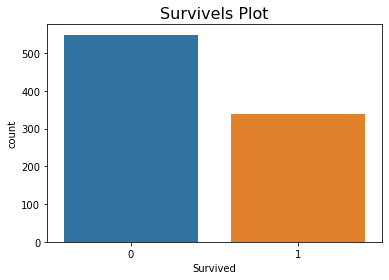

In [957]:
plt.figsize=(12,10)
plt.title('Survivels Plot', fontsize = 16)
sns.countplot('Survived',data=train_data)
plt.show()

It seems like only 38% of people who survived in Titanic

In [958]:
train_data.Embarked.value_counts(normalize=True)

S    0.727477
C    0.185811
Q    0.086712
Name: Embarked, dtype: float64

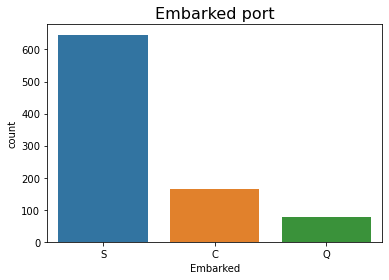

In [959]:
plt.figsize=(12,10)
plt.title('Embarked port', fontsize = 16)
sns.countplot('Embarked',data=train_data),
plt.show()

Most of the Passengers are of from 'S' i.e., Southampton Location

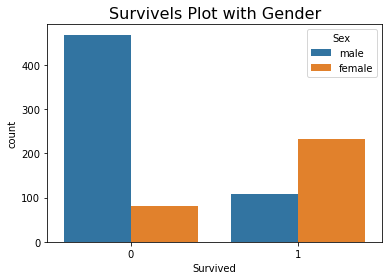

In [960]:
plt.figsize=(12,10)
plt.title('Survivels Plot with Gender',fontsize = 16)
sns.countplot(x='Survived', hue='Sex', data=train_data);

Its observed that Female Death ratio is very high 

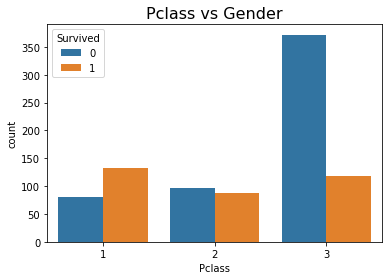

In [961]:
plt.figsize=(12,10)
plt.title('Pclass vs Gender', fontsize = 16)
sns.countplot('Pclass',hue = 'Survived', data = train_data);

Here most percentage Death found in 3rd Pclass and Survivel ratio is a bit same in both 1st & 3rd Pclass

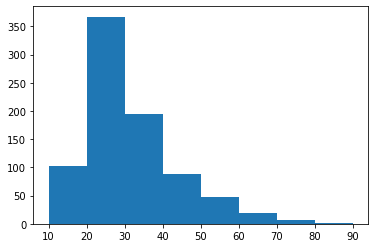

In [962]:
bins_list = [10, 20, 30, 40, 50, 60, 70, 80, 90]
plt.hist(train_data.Age,bins=bins_list);

This Histogram plot represents that the data consists mostly traveld people are Audlt (Age Group between (20-30)) 

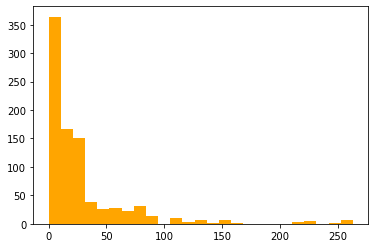

In [963]:
plt.hist(train_data.Fare, color = 'orange', bins=25);

Mostly the Fare of Ticket lies in between 0-20

<Figure size 720x2160 with 0 Axes>

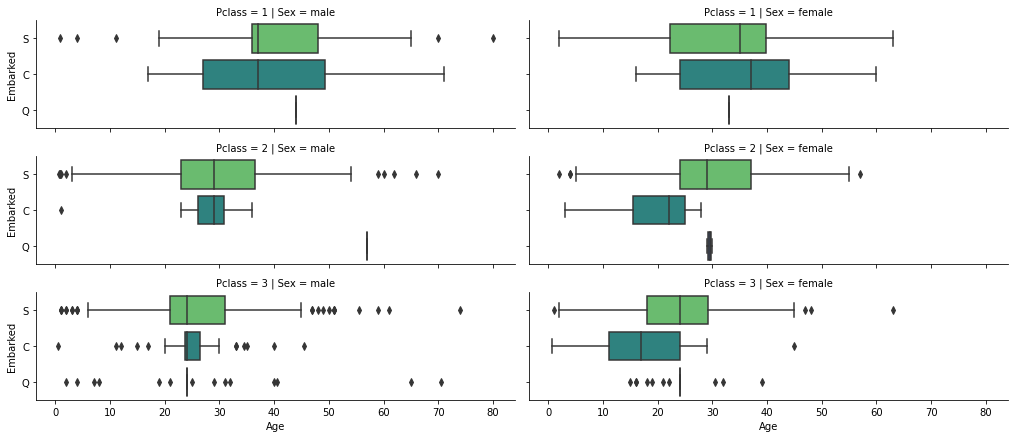

In [964]:
plt.figure(figsize=(10,30))
sns.factorplot(x='Age', y='Embarked', col='Sex', orient='h', row='Pclass',
               data=train_data, size=2, aspect=3.5, palette='viridis_r',kind='box')
plt.show();

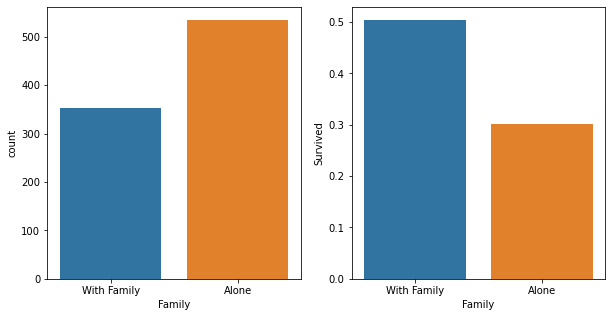

In [965]:
# Family

# Instead of having two columns Parch & SibSp, 
# we can have only one column represent if the passenger had any family member aboard or not,
# Meaning, if having any family member(whether parent, brother, ...etc) will increase chances of Survival or not.
train_data['Family'] =  train_data["Parch"] + train_data["SibSp"]
train_data['Family'].loc[train_data['Family'] > 0] = 1
train_data['Family'].loc[train_data['Family'] == 0] = 0

test_data['Family'] =  test_data["Parch"] + test_data["SibSp"]
test_data['Family'].loc[test_data['Family'] > 0] = 1
test_data['Family'].loc[test_data['Family'] == 0] = 0

# drop Parch & SibSp
train_data = train_data.drop(['SibSp','Parch'], axis=1)
test_data    = test_data.drop(['SibSp','Parch'], axis=1)

# plot
fig, (axis1,axis2) = plt.subplots(1,2,sharex=True,figsize=(10,5))

# sns.factorplot('Family',data=train_data,kind='count',ax=axis1)
sns.countplot(x='Family', data=train_data, order=[1,0], ax=axis1)

# average of survived for those who had/didn't have any family member
family_perc = train_data[["Family", "Survived"]].groupby(['Family'],as_index=False).mean()
sns.barplot(x='Family', y='Survived', data=family_perc, order=[1,0], ax=axis2)

axis1.set_xticklabels(["With Family","Alone"], rotation=0);

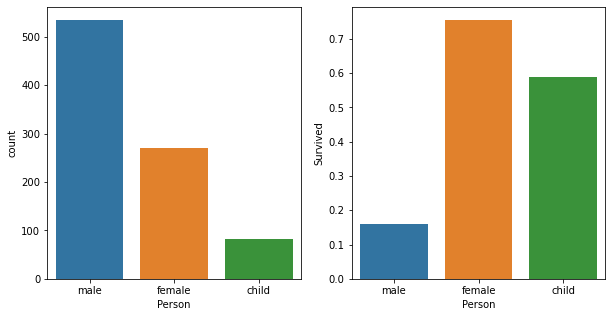

In [966]:
# Sex

# As we see, children(age < ~16) on aboard seem to have a high chances for Survival.
# So, we can classify passengers as males, females, and child
def get_person(passenger):
    Age,Sex = passenger
    return 'child' if Age < 16 else Sex
    
train_data['Person'] = train_data[['Age','Sex']].apply(get_person,axis=1)
test_data['Person'] = test_data[['Age','Sex']].apply(get_person,axis=1)

# No need to use Sex column since we created Person column
train_data.drop(['Sex'],axis=1,inplace=True)
test_data.drop(['Sex'],axis=1,inplace=True)

# create dummy variables for Person column, & drop Male as it has the lowest average of survived passengers
person_dummies_titanic  = pd.get_dummies(train_data['Person'])
person_dummies_titanic.columns = ['Child','Female','Male']
person_dummies_titanic.drop(['Male'], axis=1, inplace=True)

person_dummies_test  = pd.get_dummies(test_data['Person'])
person_dummies_test.columns = ['Child','Female','Male']
person_dummies_test.drop(['Male'], axis=1, inplace=True)

train_data = train_data.join(person_dummies_titanic)
test_data = test_data.join(person_dummies_test)

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(10,5))

# sns.factorplot('Person',data=titanic_df,kind='count',ax=axis1)
sns.countplot(x='Person', data=train_data, ax=axis1)

# average of survived for each Person(male, female, or child)
person_perc = train_data[["Person", "Survived"]].groupby(['Person'],as_index=False).mean()
sns.barplot(x='Person', y='Survived', data=person_perc, ax=axis2, order=['male','female','child'])

train_data.drop(['Person'],axis=1,inplace=True)
test_data.drop(['Person'],axis=1,inplace=True)

In [967]:
# age_split = [0,10,18,25,40,90]
# age_status = ['Adolescent','Teenager','Young Adult','Adult','Elder']

# train_data['agegroup']=pd.cut(train_data.Age,age_split,labels=age_status)
# train_data

In [968]:
train_data

,PassengerId,Survived,Pclass,Name,Age,Ticket,Fare,Embarked,Family,Child,Female
0,1,0,3,"Braund, Mr. Owen Harris",22.0,A/5 21171,7.2500,S,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,PC 17599,71.2833,C,1,0,1
2,3,1,3,"Heikkinen, Miss. Laina",26.0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,113803,53.1000,S,1,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,373450,8.0500,S,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,211536,13.0000,S,0,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,112053,30.0000,S,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",24.0,W./C. 6607,23.4500,S,1,0,1
889,890,1,1,"Behr, Mr. Karl Howell",26.0,111369,30.0000,C,0,0,0


In [969]:
test_data

,PassengerId,Pclass,Name,Age,Ticket,Fare,Embarked,Family,Child,Female
0,892,3,"Kelly, Mr. James",34.5,330911,7.8292,Q,0,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,363272,7.0000,S,1,0,1
2,894,2,"Myles, Mr. Thomas Francis",62.0,240276,9.6875,Q,0,0,0
3,895,3,"Wirz, Mr. Albert",27.0,315154,8.6625,S,0,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,3101298,12.2875,S,1,0,1
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",24.0,A.5. 3236,8.0500,S,0,0,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",39.0,PC 17758,108.9000,C,0,0,1
415,1307,3,"Saether, Mr. Simon Sivertsen",38.5,SOTON/O.Q. 3101262,7.2500,S,0,0,0
416,1308,3,"Ware, Mr. Frederick",24.0,359309,8.0500,S,0,0,0


## Building a Model
Let's start by splitting our train_data into a training set and test set (there is another test.csv file that you can use it for Testing).

In [970]:
X_values=['Pclass','Age','Fare','Family','Child','Female']
X_train=train_data[X_values]

In [971]:
X_values1=['Pclass','Age','Fare','Family','Child','Female']
X_test=test_data[X_values]

In [972]:
y_train=train_data.Survived

In [973]:
X_train

,Pclass,Age,Fare,Family,Child,Female
0,3,22.0,7.2500,1,0,0
1,1,38.0,71.2833,1,0,1
2,3,26.0,7.9250,0,0,1
3,1,35.0,53.1000,1,0,1
4,3,35.0,8.0500,0,0,0
...,...,...,...,...,...,...
886,2,27.0,13.0000,0,0,0
887,1,19.0,30.0000,0,0,1
888,3,24.0,23.4500,1,0,1
889,1,26.0,30.0000,0,0,0


In [974]:
X_test

,Pclass,Age,Fare,Family,Child,Female
0,3,34.5,7.8292,0,0,0
1,3,47.0,7.0000,1,0,1
2,2,62.0,9.6875,0,0,0
3,3,27.0,8.6625,0,0,0
4,3,22.0,12.2875,1,0,1
...,...,...,...,...,...,...
413,3,24.0,8.0500,0,0,0
414,1,39.0,108.9000,0,0,1
415,3,38.5,7.2500,0,0,0
416,3,24.0,8.0500,0,0,0


In [975]:
num_values_train = ['Age','Fare']
scaling = X_train[num_values_train]
scaling

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,24.0,23.4500
889,26.0,30.0000


In [976]:
num_values_test = ['Age','Fare']
scaling2 = X_test[num_values_test]
scaling2

,Age,Fare
0,34.5,7.8292
1,47.0,7.0000
2,62.0,9.6875
3,27.0,8.6625
4,22.0,12.2875
...,...,...
413,24.0,8.0500
414,39.0,108.9000
415,38.5,7.2500
416,24.0,8.0500


In [977]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train[num_values_train])
X_train[num_values_train] = sc.transform(X_train[num_values_train])
X_train

,Pclass,Age,Fare,Family,Child,Female
0,3,-0.531540,-0.566959,1,0,0
1,1,0.675607,0.989016,1,0,1
2,3,-0.229753,-0.550557,0,0,1
3,1,0.449267,0.547171,1,0,1
4,3,0.449267,-0.547519,0,0,0
...,...,...,...,...,...,...
886,2,-0.154306,-0.427237,0,0,0
887,1,-0.757880,-0.014146,0,0,1
888,3,-0.380646,-0.173308,1,0,1
889,1,-0.229753,-0.014146,0,0,0


In [978]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc2 = StandardScaler()
sc2.fit(X_test[num_values_test])
X_test[num_values_test] = sc2.transform(X_test[num_values_test])
X_test

,Pclass,Age,Fare,Family,Child,Female
0,3,0.401187,-0.497811,0,0,0
1,3,1.371800,-0.512660,1,0,1
2,2,2.536536,-0.464532,0,0,0
3,3,-0.181181,-0.482888,0,0,0
4,3,-0.569426,-0.417971,1,0,1
...,...,...,...,...,...,...
413,3,-0.414128,-0.493856,0,0,0
414,1,0.750607,1.312180,0,0,1
415,3,0.711783,-0.508183,0,0,0
416,3,-0.414128,-0.493856,0,0,0


In [979]:
X_test.isna().sum()

Pclass    0
Age       0
Fare      0
Family    0
Child     0
Female    0
dtype: int64

In [980]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [981]:
pred_labels = model.predict(X_test)

actual_labels = np.array(y_test)

In [982]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:\n")
accuracy_score(actual_labels,pred_labels)

Accuracy:



0.947242206235012

## Random Forest

In [984]:
from sklearn.ensemble import RandomForestClassifier
regressor = RandomForestClassifier(n_estimators=20, random_state=0)  
regressor.fit(X_train, y_train)
pred_labels=regressor.predict(X_test)
actual_labels = np.array(y_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(actual_labels,pred_labels))  
print(classification_report(actual_labels,pred_labels))  
print(accuracy_score(actual_labels,pred_labels))

[[242  23]
 [ 52 100]]
              precision    recall  f1-score   support

           0       0.82      0.91      0.87       265
           1       0.81      0.66      0.73       152

    accuracy                           0.82       417
   macro avg       0.82      0.79      0.80       417
weighted avg       0.82      0.82      0.82       417

0.8201438848920863
